# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [1]:
NAME = "IAD21"
COLLABORATORS = "Ewa Szewczyk 406923, Adam Piwowarski 408133"

---

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 3/4)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="white")

### Wczytanie danych
Wczytaj dane z przygotowanego wcześniej pliku dane.csv do tablicy `eruptions_data` w taki sposób, aby kolumna Eruption Number stanowiła indeks tablicy.

Wyświetl przygotowaną tablicę.

In [4]:
eruptions_data = pd.read_csv('eruptions_data.csv', index_col='Eruption Number')
eruptions_data.head()

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,2.0,2022,10.0,21.0,2022.0,12.0,19.0,Observations,Reported
22481,Taal,Confirmed,1.0,2022,10.0,5.0,2022.0,10.0,29.0,Observations,Reported
22458,Turrialba,Confirmed,1.0,2022,7.0,17.0,2022.0,7.0,17.0,Observations,Reported
22453,Ulawun,Confirmed,2.0,2022,6.0,2.0,2022.0,6.0,2.0,Observations,Reported
22454,Raung,Confirmed,2.0,2022,5.0,14.0,2022.0,9.0,27.0,Observations,Satellite (infrared)


### Zadanie 4: Konstrukcja szeregów rodzielczych - bardziej skomplikowane tablice [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablicy `vei_data` zawierającej następujące elementy:

Indeks:
- VEI - wartości VEI posortowane od najmniejszej do największej.

Kolumny: </br>
- Nagłówki 1 poziomu:
    - Eruption category - All, Confirmed Eruption, Uncertain Eruption
- Nagłówki 2 poziomu (dla każdego z nagłówków 1 poziomu ten sam zestaw kolumn):
    - f - zliczenia poszczególnych kategorii (ang. frequency, absolute frequency),
    - cf - zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),
    - rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency),
    - crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency).

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [5]:
data = eruptions_data.copy().set_index('VEI').sort_index()

# obliczanie wartości f, cf, rf, crf
# wszystkie erupcje
all_data = data.groupby(['VEI'])['Volcano Name'].agg(['count']).rename(columns={'count':'f'})
all_data['cf'] = all_data.f.cumsum()
all_data['rf'] = all_data.f / all_data.f.sum()
all_data['crf'] = all_data.rf.cumsum()

# potwierdzone
confirmed_data = data[data['Eruption Category'] == 'Confirmed'].groupby('VEI')['Volcano Name'].agg(['count']).rename(columns={'count':'f'})
confirmed_data['cf'] = confirmed_data.f.cumsum()
confirmed_data['rf'] = confirmed_data.f / confirmed_data.f.sum()
confirmed_data['crf'] = confirmed_data.rf.cumsum()

# niepewne
uncertain_data = data[data['Eruption Category'] == 'Uncertain'].groupby('VEI')['Volcano Name'].agg(['count']).rename(columns={'count':'f'})
uncertain_data['cf'] = uncertain_data.f.cumsum()
uncertain_data['rf'] = uncertain_data.f / uncertain_data.f.sum()
uncertain_data['crf'] = uncertain_data.rf.cumsum()


# joining tables
vei_data = pd.concat([all_data, confirmed_data, uncertain_data], axis=1)
iterables = [['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'], ['f', 'cf', 'rf', 'crf']]
vei_data.columns = pd.MultiIndex.from_product(iterables)

# wyświetlanie
format_dict = {("All eruptions", 'f'): '{:.0f}', ("All eruptions", 'cf'): '{:.0f}', ("All eruptions", 'rf'): '{:.4f}', ("All eruptions", 'crf'): '{:.4f}', \
              ("Confirmed Eruptions", 'f'): '{:.0f}', ("Confirmed Eruptions", 'cf'): '{:.0f}', ("Confirmed Eruptions", 'rf'): '{:.4f}', ("Confirmed Eruptions", 'crf'): '{:.4f}', \
              ("Uncertain Eruptions", 'f'): '{:.0f}', ("Uncertain Eruptions", 'cf'): '{:.0f}', ("Uncertain Eruptions", 'rf'): '{:.4f}', ("Uncertain Eruptions", 'crf'): '{:.4f}'}
to_export = vei_data.style.format_index('{:.0f}').format(format_dict)

dfi.export(to_export, 'vei_data.png')

to_export

In [6]:
## Komórka testowa
# Test 1: Indeks
assert (vei_data.index.name == 'VEI') == True
assert list(vei_data.index) == [0, 1, 2, 3, 4, 5, 6, 7]
# Test 2: Kolumny
assert len(set(list(vei_data.columns.levels[0])) & set(['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])) == 3
assert list(vei_data.columns.levels[1]) == ['cf', 'crf', 'f', 'rf']
# Test 3: Wartości w kolumnach f
assert list(vei_data['All eruptions']['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
assert list(vei_data['Confirmed Eruptions']['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
assert list(vei_data['Uncertain Eruptions']['f'].values[:5]) == [204, 157, 264, 19, 1] 
assert np.all(np.isnan(vei_data['Uncertain Eruptions']['f'].values[5:]))

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

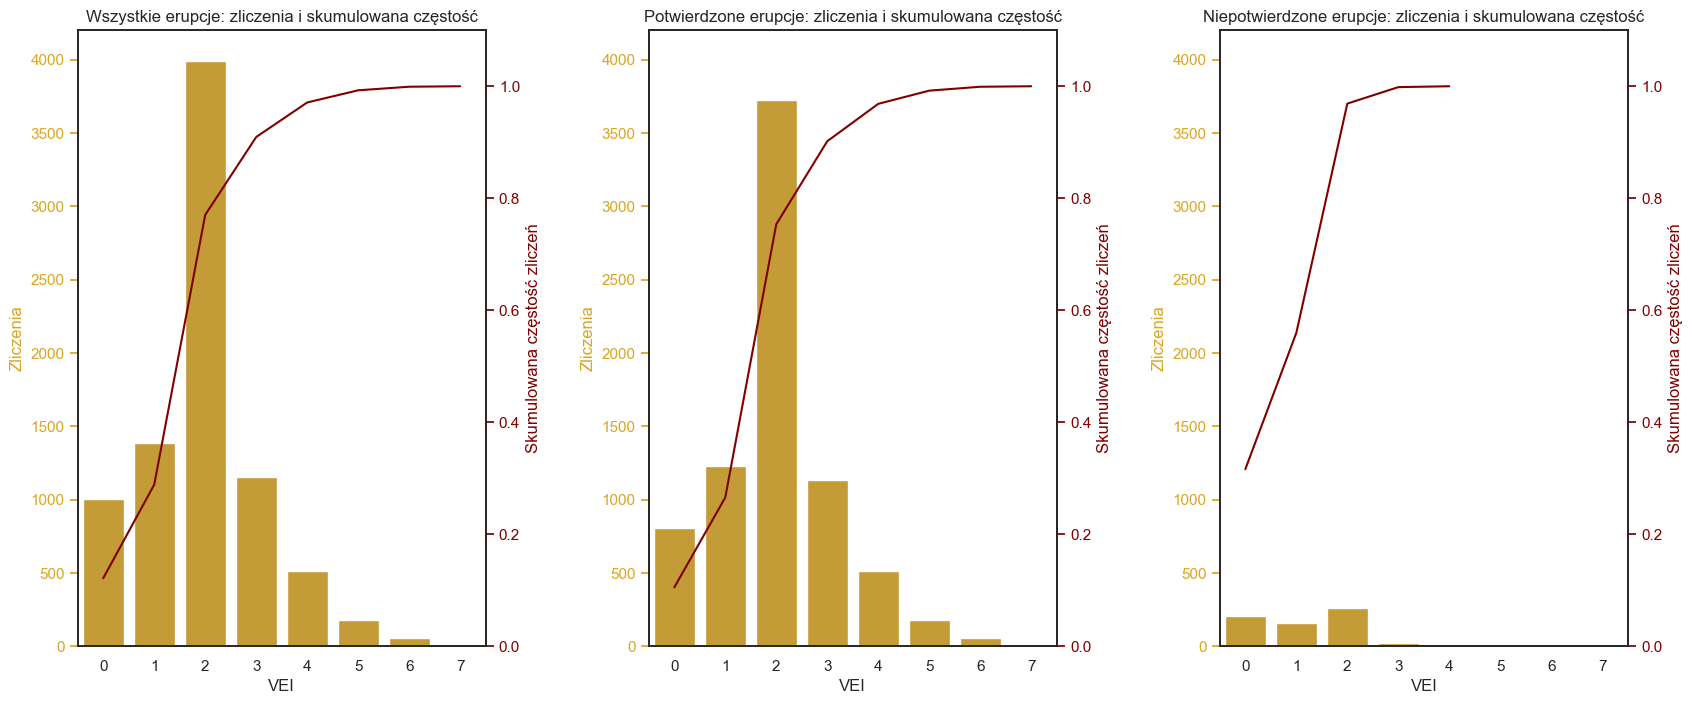

In [7]:
fig, axes = plt.subplots(1,3,figsize=(20,8))

ax1 = axes[0].twinx()
ax2 = axes[1].twinx()
ax3 = axes[2].twinx()

# pierwszy wykres
sns.barplot(x=vei_data.index, y=vei_data['All eruptions'].f, ax=axes[0], color='goldenrod')
sns.lineplot(x=vei_data.index, y=vei_data['All eruptions'].crf, ax=ax1, linewidth=1.5, color='maroon')

axes[0].set(title='Wszystkie erupcje: zliczenia i skumulowana częstość', aspect='auto', ylim=[0,4200], xlim=[-0.5,7.5],
           ylabel='Zliczenia')
ax1.set(ylim=[0,1.1], ylabel='Skumulowana częstość zliczeń')

axes[0].tick_params(color='goldenrod', labelcolor='goldenrod', axis='y')
ax1.tick_params(color='maroon', labelcolor='maroon', axis='y')

axes[0].yaxis.label.set_color('goldenrod')
ax1.yaxis.label.set_color('maroon')

# drugi wykres
sns.barplot(x=vei_data.index, y=vei_data['Confirmed Eruptions'].f, ax=axes[1], color='goldenrod')
sns.lineplot(x=vei_data.index, y=vei_data['Confirmed Eruptions'].crf, ax=ax2, color='maroon')

axes[1].set(title='Potwierdzone erupcje: zliczenia i skumulowana częstość', ylim=[0,4200], xlim=[-0.5,7.5], ylabel='Zliczenia')
ax2.set(ylim=[0,1.1], ylabel='Skumulowana częstość zliczeń')

axes[1].tick_params(color='goldenrod', labelcolor='goldenrod', axis='y')
ax2.tick_params(color='maroon', labelcolor='maroon', axis='y')

axes[1].yaxis.label.set_color('goldenrod')
ax2.yaxis.label.set_color('maroon')

# trzeci wykres
sns.barplot(x=vei_data.index, y=vei_data['Uncertain Eruptions'].f, ax=axes[2], color='goldenrod')
sns.lineplot(x=vei_data.index, y=vei_data['Uncertain Eruptions'].crf, ax=ax3, color='maroon')

axes[2].set(title='Niepotwierdzone erupcje: zliczenia i skumulowana częstość', ylim=[0,4200], xlim=[-0.5,7.5], ylabel='Zliczenia')
ax3.set(ylim=[0,1.1], ylabel='Skumulowana częstość zliczeń')

axes[2].tick_params(color='goldenrod', labelcolor='goldenrod', axis='y')
ax3.tick_params(color='maroon', labelcolor='maroon', axis='y')

axes[2].yaxis.label.set_color('goldenrod')
ax3.yaxis.label.set_color('maroon')


ax1.set_xticks([0,1,2,3,4,5,6,7], labels=[0,1,2,3,4,5,6,7])
ax2.set_xticks([0,1,2,3,4,5,6,7], labels=[0,1,2,3,4,5,6,7])
ax3.set_xticks([0,1,2,3,4,5,6,7], labels=[0,1,2,3,4,5,6,7])

plt.subplots_adjust(wspace=0.4)

plt.show()

### Zadanie 5: Rodzaje metod wykrywania erupcji [10 pkt]

Przygotuj tablice `evidence_data` zawiarającą informacje o tym ile erupcji o poszczególnych wartościach VEI zostało potwierdzonych przy użyciu poszczególnych metod weryfikacji.
Tablica powinna zawierać następujące elementy:

Indeks:
- Nagłówki 1 poziomu
    - kategoria dowodów
- Nagłówki 2 poziomu:
    - metoda, która dostarczyła dowodów

Kolumny: </br>
- VEI - wartości VEI posortowane od najmniejszej do największej oraz kolumna "All", w której znajdują się dane dotyczące wszystkich erupcji, bez podziału na VEI.

Wyświetl przygotowane tablicę w taki sposób, aby zawarte w tablicy liczby (w tym wartości VEI w nagłówkach kolumn) wyświetlały się bez miejsc po przecinku.

In [8]:
evidence_data = eruptions_data.copy().reset_index()

# stworzenie odpowiedniej pivot table
evidence_data = evidence_data.pivot_table('Eruption Number', index=['Evidence Type', 'Evidence Method'], columns='VEI', margins=True, aggfunc='count')
evidence_data = evidence_data.drop('All', axis=0, level=0).fillna(0) #bo test nie przechodzil
to_export = evidence_data.style.format(precision=0).format_index(axis=1, precision=0)

dfi.export(to_export, 'evidence_data.png')

to_export

In [9]:
# Test 1 Kształt tablicy
assert evidence_data.shape == (22, 9)
# # Test 2 Kolumny
assert len(set(list(evidence_data.columns)) & set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 'All'])) == 9
# Test 3 Indeks
assert (eruptions_data.index.name == 'Eruption Number') == True
assert len(set(list(evidence_data.index)) & set([('Observations', 'Reported'), ('Observations', 'Satellite (infrared)'), ('Observations', 'Satellite (visual)'),
                                ('Observations', 'Seismicity'), ('Observations', 'Hydrophonic'), ('Observations', 'Photo / Video'), ('Observations', 'Aviation'),
                                ('Uncertain', 'Unspecified'), ('Isotopic', 'Uranium-series'), ('Isotopic', '14C (calibrated)'), ('Isotopic', '14C (uncalibrated)'),
                                ('Isotopic', 'Cosmic Ray Exposure'), ('Isotopic', 'Ar/Ar'), ('Isotopic', 'K/Ar'), ('Correlation', 'Magnetism'), ('Correlation', 'Tephrochronology'),
                                ('Correlation', 'Anthropology'), ('Sidereal', 'Varve Count'), ('Sidereal', 'Dendrochronology'), ('Sidereal', 'Ice Core'), ('Radiogenic', 'Fission track'),
                                ('Radiogenic', 'Thermoluminescence')])) == 22
# Test 4 Kilka losowo wybranych wartości w tablicy
assert evidence_data.loc[('Observations', 'Reported'), 0] == 376
assert evidence_data.loc[('Uncertain', 'Unspecified'), 3] == 22
assert evidence_data.loc[('Sidereal', 'Ice Core'), 7] == 2
assert evidence_data.loc[('Isotopic', '14C (uncalibrated)'), 5] == 41
assert evidence_data.loc[('Correlation', 'Anthropology'), 6] == 0

### Zadanie 6: Wizualizacja rozkładu zarejestrowanych erupcji w czasie [2 pkt]

Korzystając z funkcji `seaborn.stripplot()` zwizualizuj jak rozkładały się w czasie wystąpienia zarejestrowanych erupcji. Do rozróżnienia erupcji w czasie wykorzystaj rok, w którym nastąpił ich początek.

Wyniki zestaw na pojedynczej figurze (siatka wykresów 2x1). Na górnym wykresie przedstaw dane rozróżnione tylko po kątem VEI, a na dolnym wykresie przedstaw dane rozróżnione zarówno po VEI jak i rodzaju dowodu ich wystąpienia (Evidence Type). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- dodaj legendę do dolnego wykresu w taki sposób, aby nie zasłaniała znajdujących nię na nim danych,
- ustaw format wyświetlania wartości VEI bez miejsc po przecinku.

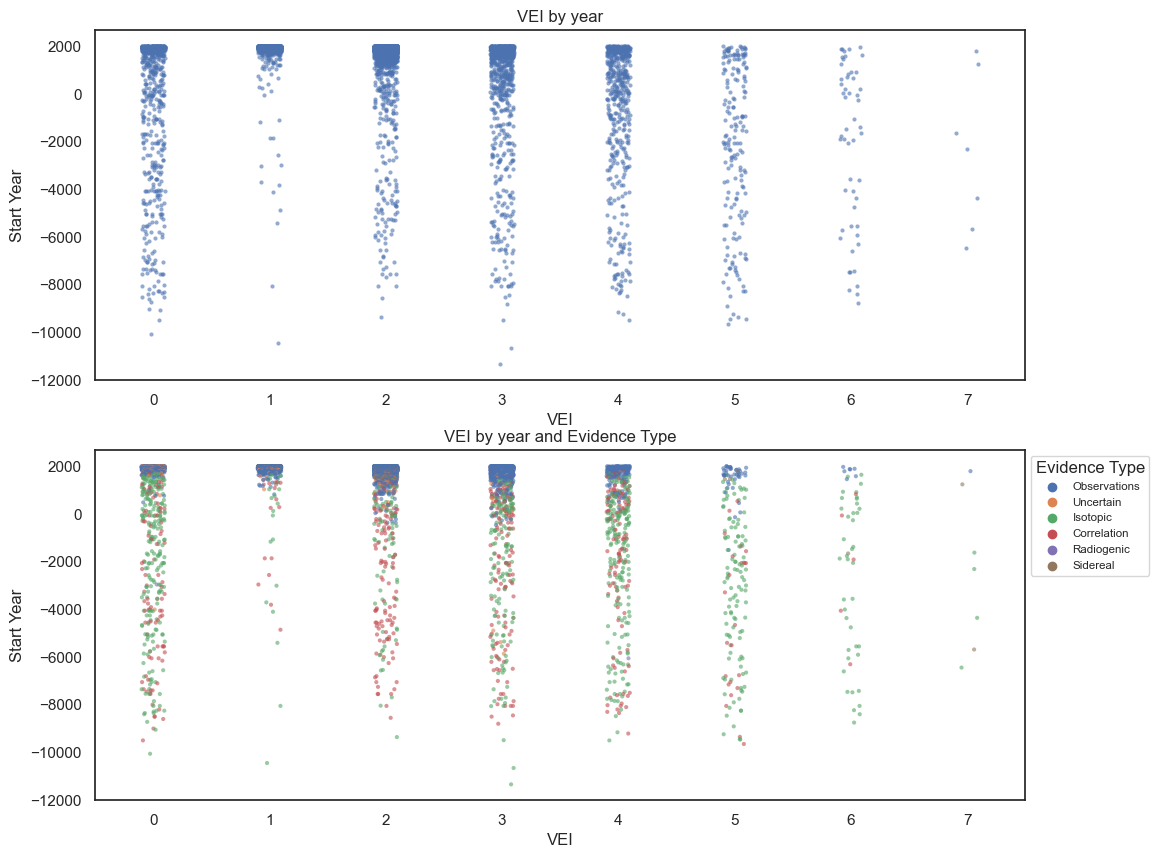

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(12,10))

sns.stripplot(data=eruptions_data, x="VEI", y="Start Year", alpha=0.6, s=3, ax=axes[0])
sns.stripplot(data=eruptions_data, x="VEI", y="Start Year", hue='Evidence Type', alpha=0.6, s=3, ax=axes[1])

axes[0].set_xticks([0,1,2,3,4,5,6,7], labels=[0,1,2,3,4,5,6,7])
axes[1].set_xticks([0,1,2,3,4,5,6,7], labels=[0,1,2,3,4,5,6,7])

axes[1].legend(fontsize='x-small', title='Evidence Type', bbox_to_anchor=(1, 1))

axes[0].set(title='VEI by year')
axes[1].set(title='VEI by year and Evidence Type')

fig.savefig('03_metody.png')
plt.show()